In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
energy_data = pd.read_csv("energydata_complete_revised.csv")
day_name_encoding = pd.get_dummies(energy_data['day_name'], drop_first=True)
data = pd.concat([energy_data,day_name_encoding],axis=1 )
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,week,day_name,day_of_week,weekday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,2,Monday,0,0,1,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,2,Monday,0,0,1,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,2,Monday,0,0,1,0,0,0,0,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,2,Monday,0,0,1,0,0,0,0,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,2,Monday,0,0,1,0,0,0,0,0


In [4]:
X = energy_data.drop(['Appliances', 'day_name', 'date'], axis =1)
y = energy_data['Appliances']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Selection

## Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_)
rfe.score(X_train, y_train)

# Prediction Model

## Linear Regression

Independent variables are used to predict the value of a dependent variable

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = energy_data[['hours','T1','RH_1','RH_5','RH_6','RH_8','T_out','Windspeed','Visibility','Tdewpoint']]
y = energy_data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(lm.intercept_)

-97.8260529478


In [10]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

            Coefficient
hours          1.717167
T1             0.870430
RH_1           8.364219
RH_5          -0.072304
RH_6           0.052212
RH_8          -4.614726
T_out          2.539544
Windspeed      2.431697
Visibility     0.217996
Tdewpoint     -4.636342


In [11]:
predictions = lm.predict(X_test)

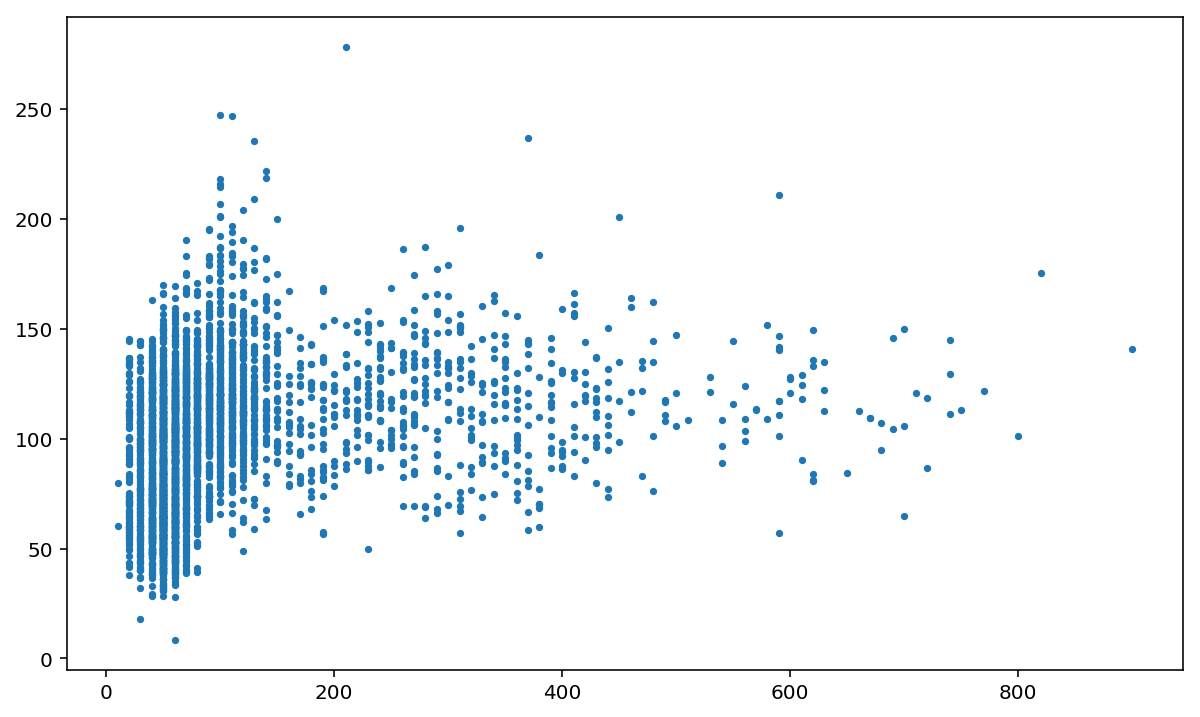

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions, s = 7)

### Residual Histogram

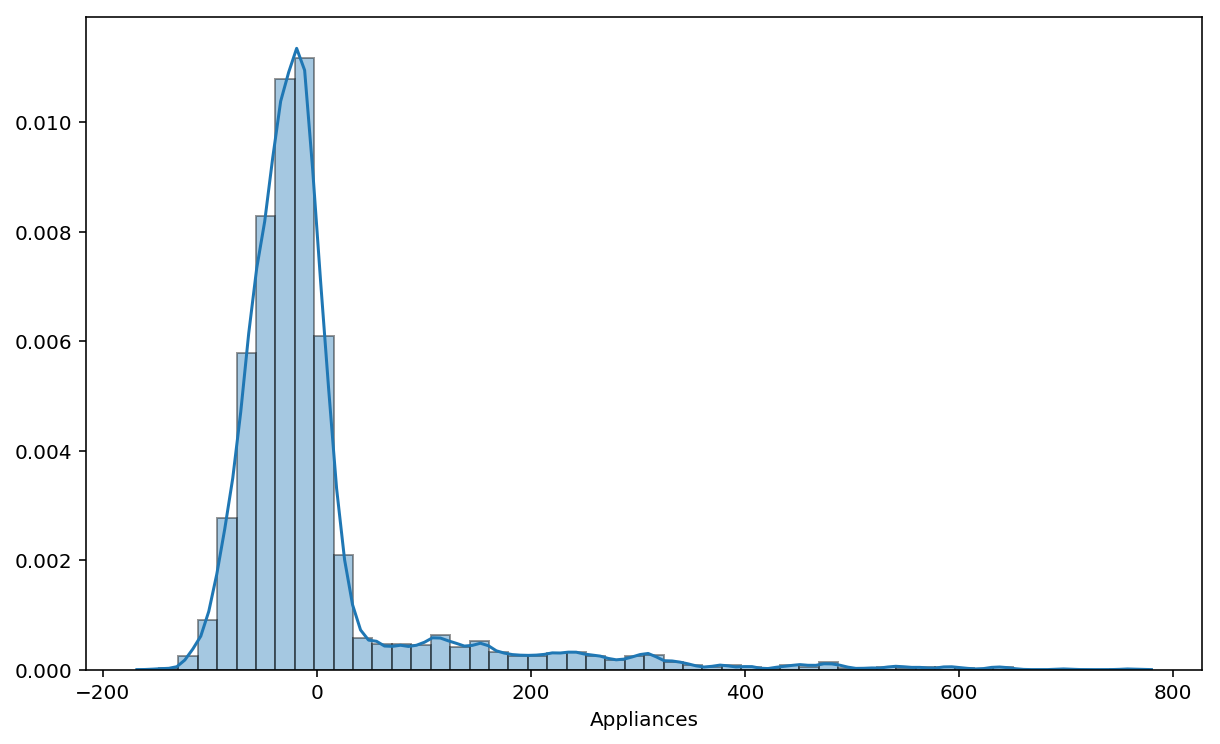

In [13]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions),bins=50);

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 55.3358885225
MSE: 9116.53059277
RMSE: 95.4805246779
R2: 0.0822771755142


# Random Forrest

Fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

In [19]:
labels = np.array(energy_data['Appliances'])
features = energy_data[['hours','T1','RH_1','RH_5','RH_6','RH_8','T_out','Windspeed','Visibility','Tdewpoint']]
feature_list = list(features.columns)
features = np.array(features)

In [20]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [22]:
predictions = rf.predict(test_features)

In [24]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))
print('R2:', metrics.r2_score(test_labels, predictions))

Mean Absolute Error: 31.16 degrees.
Accuracy: 68.59 %.
MAE: 31.159014998
MSE: 4232.98236749
RMSE: 65.0613738519
R2: 0.573883453276


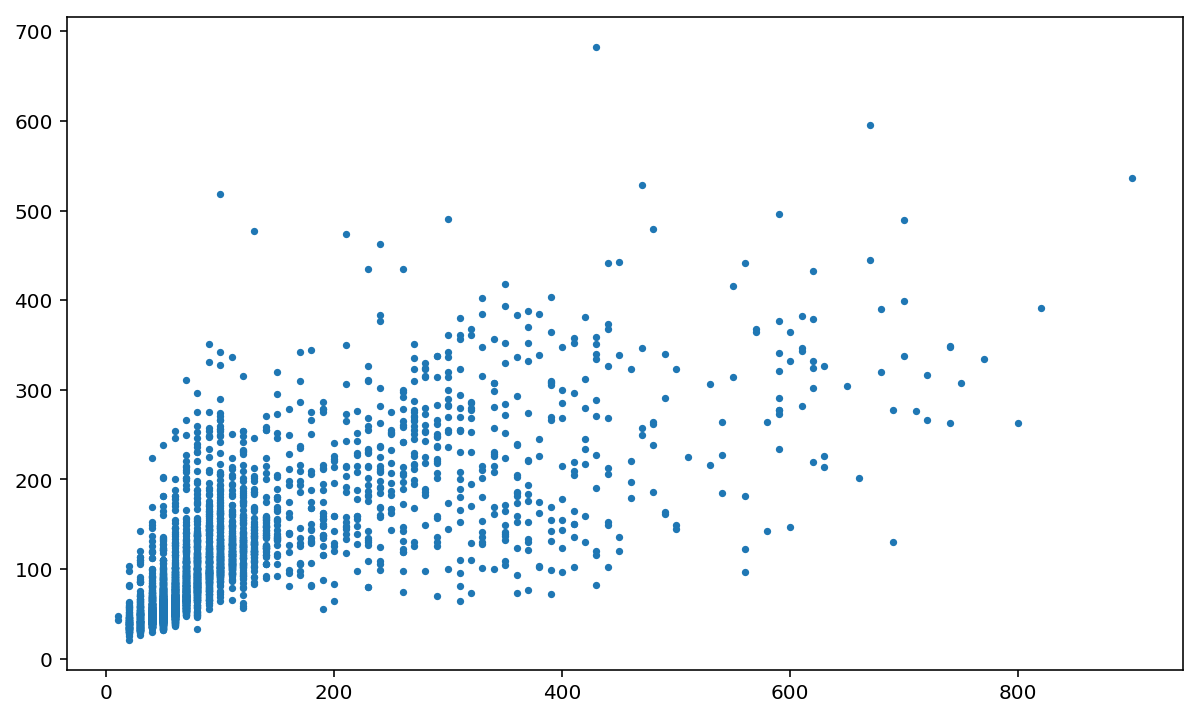

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(test_labels, predictions, s = 7)

### Residual Histogram

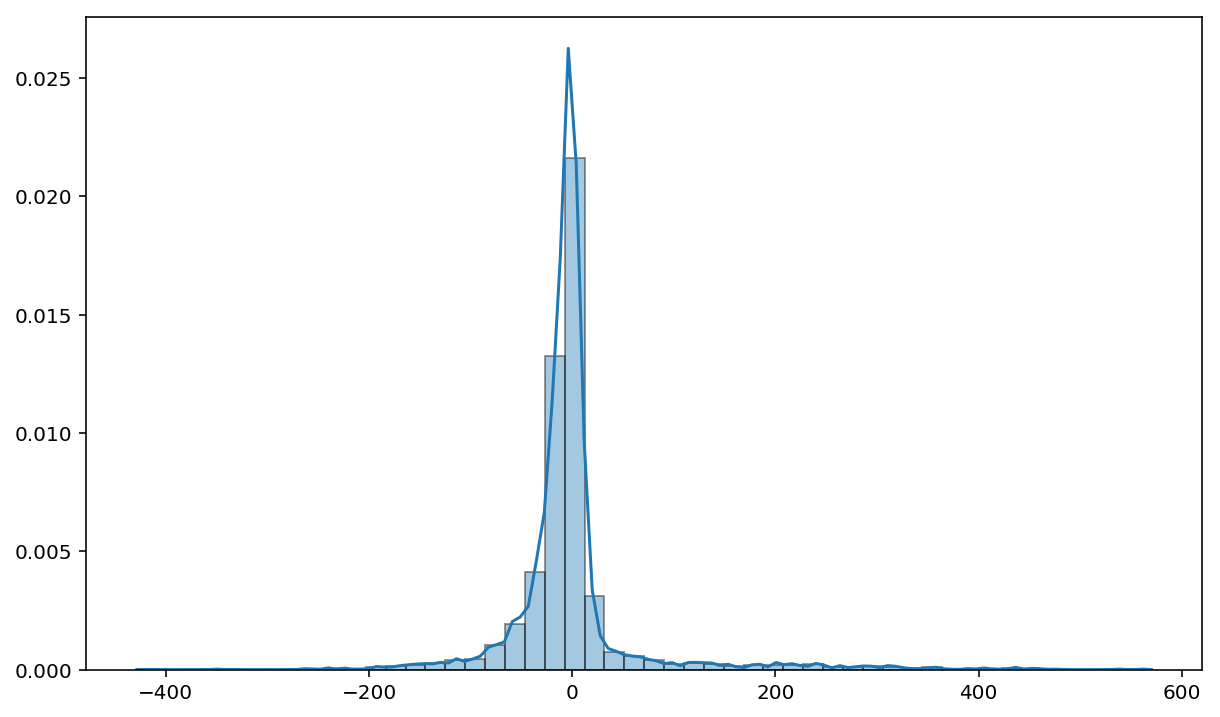

In [26]:
plt.figure(figsize=(10,6))
sns.distplot((test_labels-predictions),bins=50);

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

MAE: 31.159014998
MSE: 4232.98236749
RMSE: 65.0613738519


# Neural Networks


In [29]:
X = energy_data[['hours','T1','RH_1','RH_5','RH_6','RH_8','T_out','Windspeed','Visibility','Tdewpoint']]
y = energy_data['Appliances']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation='relu',learning_rate='adaptive',alpha=0.55)
modelneuralnetwork = nn.fit(X_train, y_train)

y_train_prediction = nn.predict(X_train)
y_test_prediction = nn.predict(X_test)

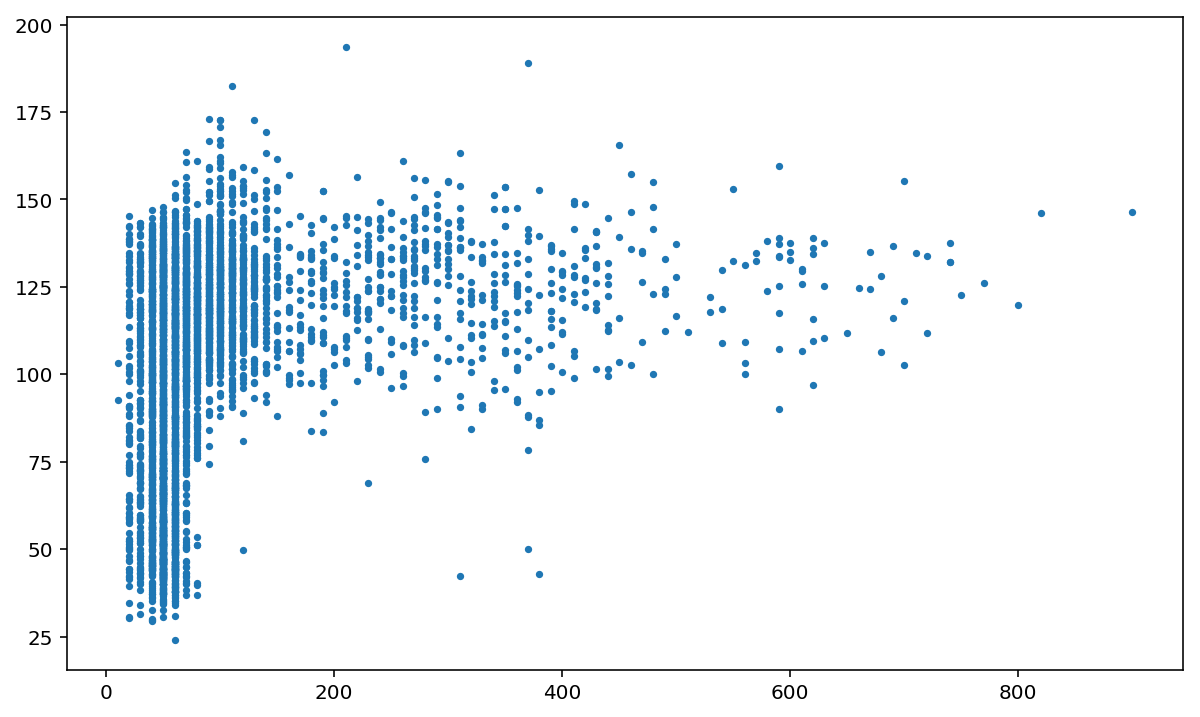

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_prediction, s = 7)

### Residual Histogram

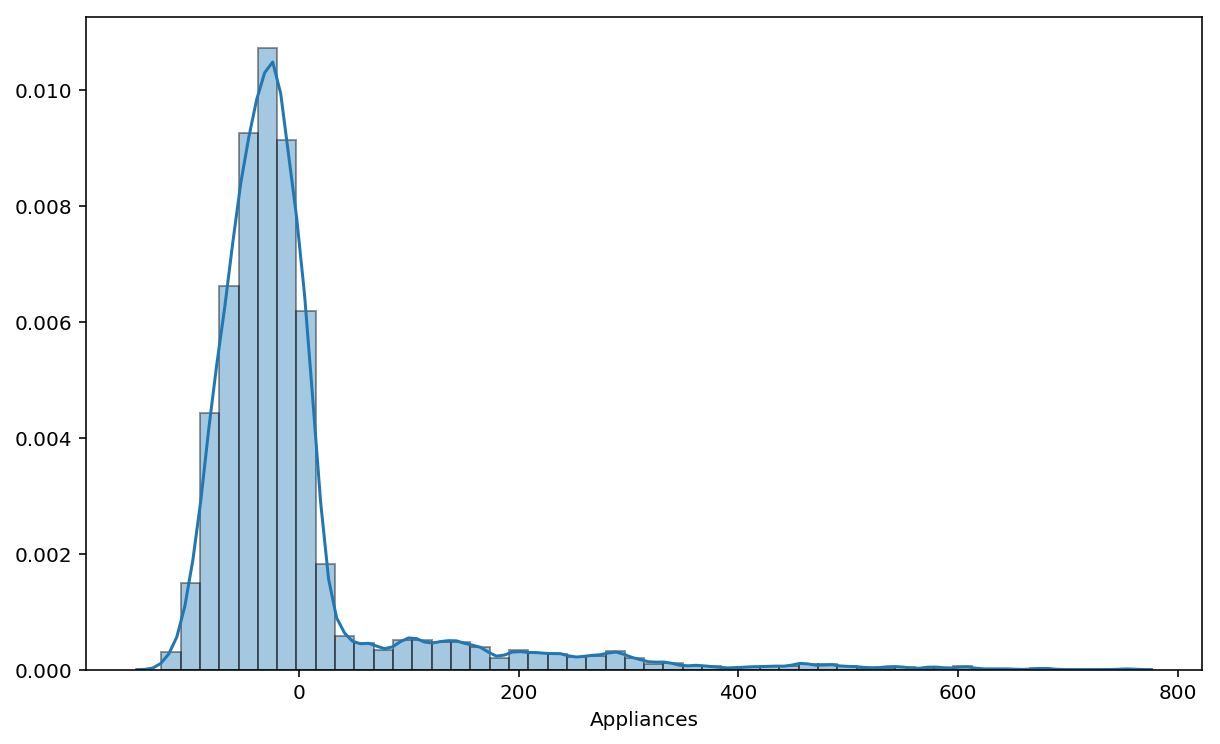

In [33]:
plt.figure(figsize=(10,6))
sns.distplot((y_test - y_test_prediction),bins=50);

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))
print('R2:', metrics.r2_score(y_test, y_test_prediction))

MAE: 56.8324185253
MSE: 8917.77015971
RMSE: 94.4339460136
R2: 0.102285553062


# Model Analysis

After analysis of the 3 models we have concluded Random Forest Regression as optimum model for prediction

In [37]:
rf.feature_importances_

array([ 0.17352077,  0.09058582,  0.11000603,  0.1022282 ,  0.09282411,
        0.10404596,  0.10637548,  0.06492203,  0.05196323,  0.10352835])

Using Random Forest choosing features

Text(0,0.5,'Feature Importance Score')

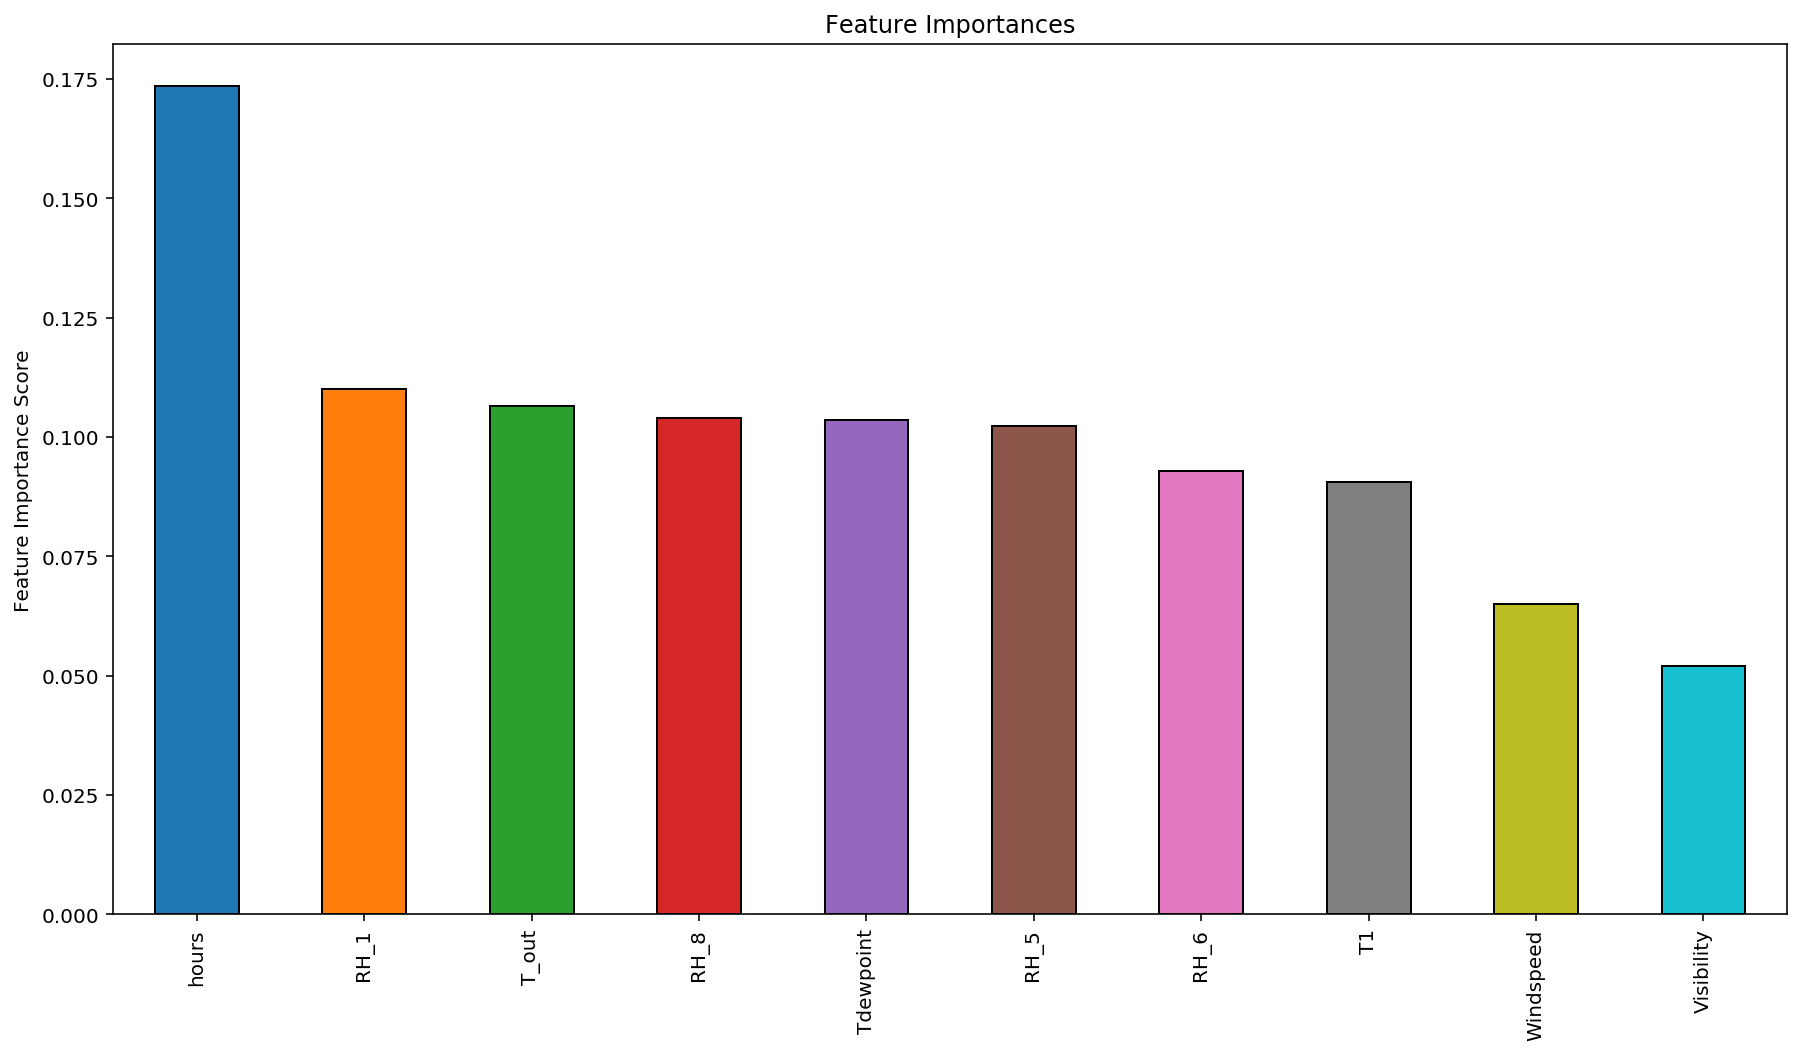

In [38]:
feat_imp = pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Feature Importance Score')